In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyecharts
import os
print(pyecharts.__version__)

1.9.1


In [3]:
def file_name_walk(file_dir):
    for root, dirs, files in os.walk(file_dir):
        print("root", root)  # 当前目录路径
        print("dirs", dirs)  # 当前路径下所有子目录
        print("files", files)  # 当前路径下所有非目录子文件


In [4]:
files_1 = os.listdir("ProblemCData\CO2 Emission")
files_2 = os.listdir("ProblemCData\State")

In [105]:
summary_2016 = pd.read_excel('ProblemCData/summary_2016.xlsx').iloc[:-6,:]
summary = summary_2016.drop(index=[0,1],axis=0)
summary.head()

,Table 1. State emissions by year (1990 - 2016),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
2,Alabama,111.092122,115.466992,122.726107,127.038855,125.120631,132.958723,139.035875,135.526720,135.547782,...,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,0.041674,4.629641
3,Alaska,35.054100,35.685200,37.298110,36.969789,36.825473,41.503806,42.450252,42.393320,43.754118,...,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,0.001355,0.047493
4,Arizona,63.491486,64.398631,67.532477,69.649832,72.475134,67.372781,69.177065,72.138275,77.575691,...,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,0.377899,23.993359
5,Arkansas,51.477171,50.380231,52.232946,51.171105,55.153835,58.564112,61.175920,59.981530,61.743580,...,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.219071,11.277145
6,California,362.964725,350.440893,356.370525,344.135973,360.699934,349.382009,347.889790,349.521529,362.299332,...,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,0.001042,0.37824


In [324]:
# 重设列名
state_index = np.array('State')
state_year = np.arange(1990,2017)
state_appendix = np.array(['Percent','Absolute'])
column = np.hstack((state_index,state_year,state_appendix))
summary.columns = column
# 重置索引
summary = summary.reset_index(drop=True)
print(summary.shape)
summary.head()

(51, 30)


,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,Percent,Absolute
0,Alabama,111.092122,115.466992,122.726107,127.038855,125.120631,132.958723,139.035875,135.526720,135.547782,...,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,0.041674,4.629641
1,Alaska,35.054100,35.685200,37.298110,36.969789,36.825473,41.503806,42.450252,42.393320,43.754118,...,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,0.001355,0.047493
2,Arizona,63.491486,64.398631,67.532477,69.649832,72.475134,67.372781,69.177065,72.138275,77.575691,...,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,0.377899,23.993359
3,Arkansas,51.477171,50.380231,52.232946,51.171105,55.153835,58.564112,61.175920,59.981530,61.743580,...,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.219071,11.277145
4,California,362.964725,350.440893,356.370525,344.135973,360.699934,349.382009,347.889790,349.521529,362.299332,...,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,0.001042,0.37824


## Picture 1

In [8]:
# 2016年总排放量排名
x_data = summary['State']
y_data = summary['2016']
# 将数据转换为列表加元组的格式（[(key1, value1), (key2, value2)]）
data=[list(z) for z in zip(x_data, y_data)]
# 数据排序
data.sort(key=lambda x: x[1])

In [9]:
# 微调数值，使图片结构更加合理清晰
for i in range(len(data)):
    if data[i][0]=='Texas':
        print(i)
        data[i][1] = '550'
    if data[i][0]=='California':
        print(i)
        data[i][1] = '320'

49
50


In [10]:
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot

# 创建饼形图并初始化配置项
fig = Pie(init_opts=opts.InitOpts(
    width='800px', height='500px', theme=ThemeType.ESSOS, bg_color='white'))

# 为饼形图添加数据
fig.add(
    series_name="States",  # 系列名称
    data_pair=data,  # 系列数据, 格式为 [(key1, value1), (key2, value2)]
    radius=["5%", "80%"],  #内外半径
    center=["50%", "50%"],  # 位置
    rosetype='radius',  # 南丁格尔图
    is_clockwise=False,  # 饼图的扇区是否是顺时针排布
    color='auto')

# 设置全局配置项
fig.set_global_opts(
    legend_opts=opts.LegendOpts(is_show=False),  # 不显示Legend图例
    visualmap_opts=opts.VisualMapOpts  # 视觉映射
    (
        is_show=False,  # 不显示映射配置
        type_='size',  # 映射过渡类型,选择size
    ))

# 设置系列配置项
fig.set_series_opts(label_opts=opts.LabelOpts(
    is_show=True,  # 显示标签
    position='left',  # 标签位置
    font_style='oblique',  # 字体风格
    font_weight='bold',  # 字体粗细
    font_family='Arial',  # 字体系列
    margin=15,
    font_size=11)  # 字体大小
                    )

# Jupyternotebook渲染图片
fig.render_notebook()

In [356]:
from snapshot_selenium import snapshot
# 渲染图表到HTML文件,存放在程序所在目录下
#fig.render("mypie1.html")
# 渲染图表为图片
make_snapshot(engine=snapshot,file_name=fig.render(),output_name='总排放量排名.jpeg')

## Picture 2
### 折线版

In [319]:
# 2016相对1990排放量变化量
data = summary.copy()
data = data.loc[:, ['State', 'Percent']]
data['Percent'] = data['Percent'] * 100
data = data.sort_values(by='Percent')
# 截取
positon = np.hstack((np.arange(0, 10), np.arange(41, 51))).tolist()
y_label = np.hstack((np.array(' '), data.iloc[:10, 0].to_numpy(),
                     np.array(' '), data.iloc[41:, 0].to_numpy()))
x_data = data.iloc[positon, 1].to_numpy()


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/1089992465.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(labels=y_label, rotation=90)


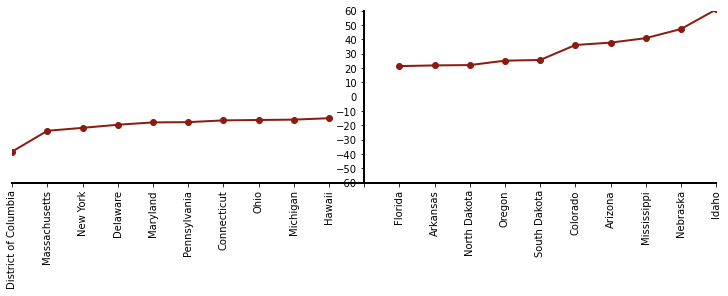

In [320]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')

# 去除顶部和右边坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 将左部坐标轴移动到中间
ax.spines['left'].set_position('center')
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# 设置
ax.tick_params(labelsize=10)

# 绘制折线图
f1, = ax.plot(np.arange(-10, 0), x_data[:10], '-o', color='#891C13', lw=2)
f2, = ax.plot(0, 0, '-o', color='white', lw=2)
f3, = ax.plot(np.arange(1, 11), x_data[10:], '-o', color='#891C13', lw=2)

from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
x_major_locator = MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator = MultipleLocator(10)
#把y轴的刻度间隔设置为10，并存在变量里
#把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(x_major_locator)
#把y轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#设置xy轴的范围
ax.set_xlim(-10, 10)
ax.set_ylim(-60, 60)
labels = ax.set_xticklabels(labels=y_label, rotation=90)

### 柱状图+折线版

In [321]:
# 2016相对1990排放量变化量
data = summary.copy()
data = data.loc[:, ['State', 'Percent']]
data['Percent'] = data['Percent'] * 100
data = data.sort_values(by='Percent')
# 截取
positon = np.hstack((np.arange(0, 10), np.arange(41, 51))).tolist()
y_label = np.hstack((data.iloc[:10, 0].to_numpy(),
                     np.array(' '), data.iloc[41:, 0].to_numpy()))
x_data = np.hstack((data.iloc[:10,1].to_numpy(),np.array(0),data.iloc[41:,1].to_numpy()))


C:\Users\Xu\AppData\Local\Temp/ipykernel_3036/903218896.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(labels=y_label, rotation=90)


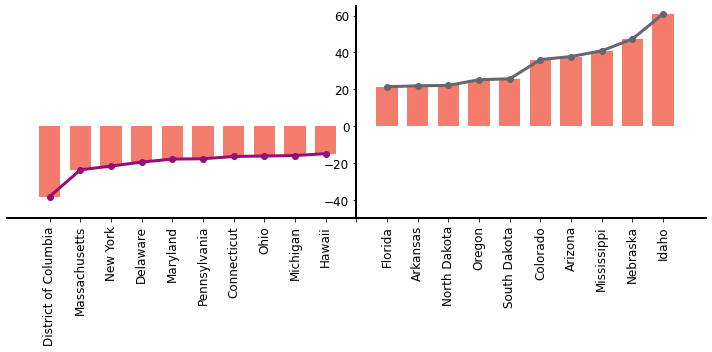

In [322]:
fig, ax = plt.subplots(figsize=(10, 5))

# 去除顶部和右边坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 将左部坐标轴移动到中间
ax.spines['left'].set_position('center')
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# 设置坐标轴字体粗细
ax.tick_params(labelsize=12)
# 绘制柱状图
ax.bar(y_label.tolist(),x_data,width=0.7,color='#F37C6C')

# 绘制折线图
f1, = ax.plot(np.arange(0,10), x_data[:10], '-o', color='#940E76', lw=3)
f3, = ax.plot(np.arange(11, 21), x_data[11:], '-o', color='#67656D', lw=3)

#设置xy轴的范围
ax.set_ylim(-50, 65)
labels = ax.set_xticklabels(labels=y_label, rotation=90)
plt.tight_layout()
plt.savefig('排放量降低率排名.jpg',dpi=300,)

## Pictrue 3

In [338]:
data = summary.copy()
state_up = data.sort_values(by='2016',ascending=False).iloc[:10,0].tolist()
state_down = data.sort_values(by='2016',ascending=False).iloc[-10:,0].tolist()

In [336]:
state_1

['Texas',
 'California',
 'Florida',
 'Pennsylvania',
 'Louisiana',
 'Ohio',
 'Illinois',
 'Indiana',
 'New York',
 'Michigan']